In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import imutils
import math
from matplotlib.colors import ListedColormap
df = pd.read_csv("idk_final.csv")
g_features = []
g_target = []
count  = 0
count_g = 0
count_o = 0
for i in range(len(df["diameter"])):
    
    if df["status"][i] == 1:
        if count < 1000 :
            g_target.append(1)
            g_features.append([df["diameter"][i],df["radius"][i],df["cataract"][i],df["other"][i]])
            count += 1
    elif df["status"][i] == 0 :
        if count_g < 700 :
            g_target.append(0)
            g_features.append([df["diameter"][i],df["radius"][i],df["cataract"][i],df["other"][i]])
            count_g = count_g + 1
    
    elif df["status"][i] == 2 :
        if count_o < 300 :
            g_target.append(0)
            g_features.append([df["diameter"][i],df["radius"][i],df["cataract"][i],df["other"][i]])
            count_o = count_o + 1
    
print(f'Select: {len(g_features)} set')
g_features = np.array(g_features)
g_target = np.array(g_target)

Select: 2000 set


Automatically created module for IPython interactive environment
====================Fold 1==================== 

accuracy_score : 0.659375
log_loss : 0.6305635725594664

====================Fold 2==================== 

accuracy_score : 0.6625
log_loss : 0.6074253248790178

====================Fold 3==================== 

accuracy_score : 0.684375
log_loss : 0.6162166203038636

====================Fold 4==================== 

accuracy_score : 0.684375
log_loss : 0.6172621600525734

====================Fold 5==================== 

accuracy_score : 0.615625
log_loss : 0.6777703700883911



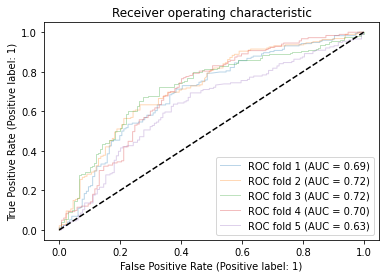

accuracy : 0.56
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.66      0.51      0.58       146
           1       0.66      0.78      0.71       174

    accuracy                           0.66       320
   macro avg       0.66      0.65      0.65       320
weighted avg       0.66      0.66      0.65       320

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       132
           1       0.69      0.76      0.73       188

    accuracy                           0.66       320
   macro avg       0.65      0.64      0.64       320
weighted avg       0.66      0.66      0.66       320

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       141
           1       0.70      0.77      0.73       

In [2]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn import svm
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold


# Import some data 
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = svm.SVC(probability=True)
history = []

mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\normal_models\\svm_normal', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    
    # Store model report in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================','\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    # Plot ROC
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i+1),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\normal\\svm_normal_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       206
           1       0.63      0.64      0.64       194

    accuracy                           0.65       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.65      0.65      0.65       400

0.645


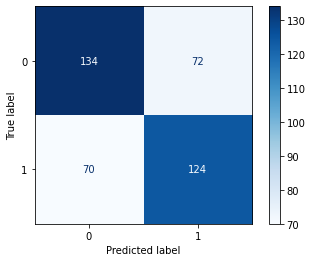

In [3]:
from sklearn.metrics import plot_confusion_matrix


# Report
classifier.fit(X_test, y_test)
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))


# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\normal\\svm_normal_matrix.jpg')

Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.61875
log_loss : 3.708080014992057

=========================Fold 2=========================
accuracy_score : 0.60625
log_loss : 3.5070495320914956

=========================Fold 3=========================
accuracy_score : 0.65
log_loss : 2.627270964705393

=========================Fold 4=========================
accuracy_score : 0.6
log_loss : 2.042364855014811

=========================Fold 5=========================
accuracy_score : 0.615625
log_loss : 3.6242989980968288



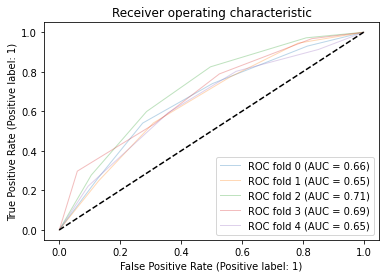

accuracy : 0.6375
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.54      0.73      0.62       135
           1       0.73      0.54      0.62       185

    accuracy                           0.62       320
   macro avg       0.63      0.63      0.62       320
weighted avg       0.65      0.62      0.62       320

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.54      0.69      0.60       139
           1       0.70      0.54      0.61       181

    accuracy                           0.61       320
   macro avg       0.62      0.62      0.61       320
weighted avg       0.63      0.61      0.61       320

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.59      0.71      0.65       143
           1       0.72      0.60      0.65     

In [4]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Import some data
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = KNeighborsClassifier(n_neighbors=4)
history = []

mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\normal_models\\knn_normal', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    
    # Store model report in history list
    history.append(classification_report(y_val,predict))
    
    
    #Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    # Plot ROC
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\normal\\knn_normal_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.68      0.88      0.76       206
           1       0.81      0.55      0.66       194

    accuracy                           0.72       400
   macro avg       0.74      0.72      0.71       400
weighted avg       0.74      0.72      0.71       400

0.72


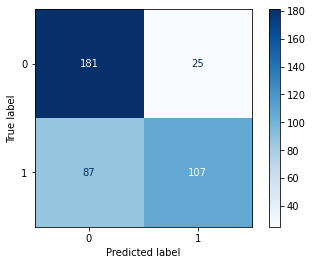

In [5]:
from sklearn.metrics import plot_confusion_matrix

# Report
classifier.fit(X_test, y_test)
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))


# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\normal\\knn_normal_matrix.jpg')

Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.546875
log_loss : 0.6891028638073531

=========================Fold 2=========================
accuracy_score : 0.546875
log_loss : 0.6876082051436313

=========================Fold 3=========================
accuracy_score : 0.575
log_loss : 0.681541513834558

=========================Fold 4=========================
accuracy_score : 0.5875
log_loss : 0.6769595259313225

=========================Fold 5=========================
accuracy_score : 0.55625
log_loss : 0.685385038959053



c:\users\rinelm\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rinelm\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rinelm\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

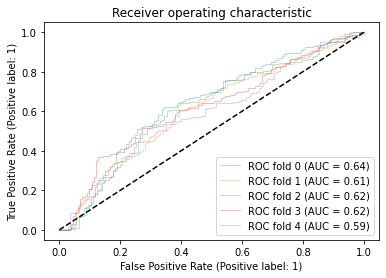

accuracy : 0.485
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.55      1.00      0.71       175

    accuracy                           0.55       320
   macro avg       0.27      0.50      0.35       320
weighted avg       0.30      0.55      0.39       320

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.55      1.00      0.71       175

    accuracy                           0.55       320
   macro avg       0.27      0.50      0.35       320
weighted avg       0.30      0.55      0.39       320

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.57      1.00      0.73      

In [6]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Import some data to play with
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = LogisticRegression(random_state=random_state)
history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\normal_models\\lg_normal', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    
    # Store model report in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    # Plot ROC
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\normal\\lg_normal_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.48      1.00      0.65       194

    accuracy                           0.48       400
   macro avg       0.24      0.50      0.33       400
weighted avg       0.24      0.48      0.32       400

0.485


c:\users\rinelm\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rinelm\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rinelm\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

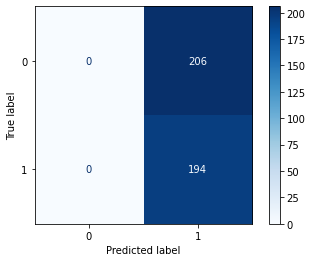

In [7]:
from sklearn.metrics import plot_confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\normal\\lg_normal_matrix.jpg')

Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.571875
log_loss : 0.6783753315391958

=========================Fold 2=========================
accuracy_score : 0.60625
log_loss : 0.683235709479203

=========================Fold 3=========================
accuracy_score : 0.615625
log_loss : 0.7251300185100623

=========================Fold 4=========================
accuracy_score : 0.6125
log_loss : 0.6634406616916311

=========================Fold 5=========================
accuracy_score : 0.571875
log_loss : 0.6995916028357365



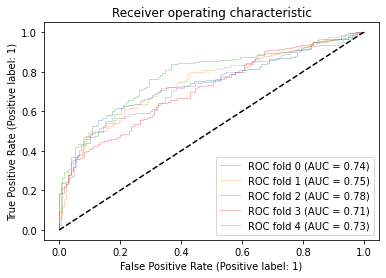

accuracy : 0.585
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.77      0.13      0.23       151
           1       0.55      0.96      0.70       169

    accuracy                           0.57       320
   macro avg       0.66      0.55      0.47       320
weighted avg       0.66      0.57      0.48       320

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.68      0.15      0.25       137
           1       0.60      0.95      0.73       183

    accuracy                           0.61       320
   macro avg       0.64      0.55      0.49       320
weighted avg       0.63      0.61      0.53       320

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.63      0.18      0.28       133
           1       0.61      0.93      0.74      

In [8]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold


# Import some data to play with
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = GaussianNB()
history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\normal_models\\nb_normal', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    # Store model report in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    # Plot ROC
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\normal\\nb_normal_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.88      0.22      0.36       206
           1       0.54      0.97      0.69       194

    accuracy                           0.58       400
   macro avg       0.71      0.60      0.53       400
weighted avg       0.72      0.58      0.52       400

0.585


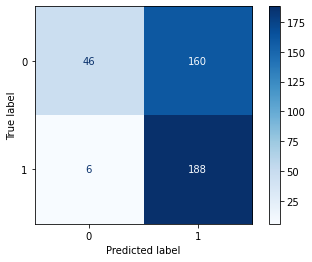

In [9]:
from sklearn.metrics import plot_confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\normal\\nb_normal_matrix.jpg')